In [1]:
import tensorflow as tf
import keras

print(tf.__version__)

print(keras.__version__)

2022-05-26 11:07:47.813285: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-26 11:07:47.813326: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1
2.9.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

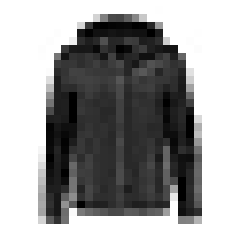

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

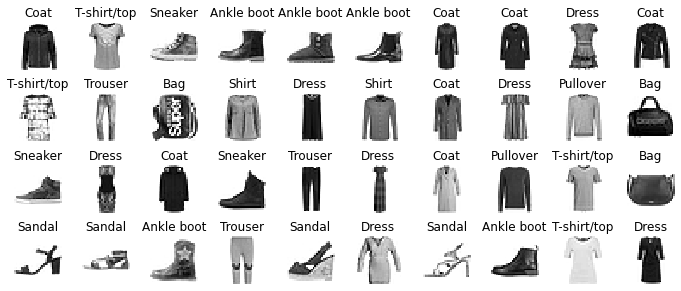

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad

Wykonaj analogiczne zadanie dla 
* Adam bez LearningRateScheduler i learning_rate=0.001
* Adam z użyciem LearningRateScheduler i learning_rate=0.001
* Adam z użyciem LearningRateScheduler i learning_rate=0.0001

Zwizualizuj wyniki:

* porównaj krzywe uczenia

In [11]:
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate


keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model1.summary()

model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model2.summary()

model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)        

2022-05-26 11:07:55.237792: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-26 11:07:55.237837: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-26 11:07:55.237867: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hania-dell): /proc/driver/nvidia/version does not exist
2022-05-26 11:07:55.238595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.callbacks import LearningRateScheduler
lrate = LearningRateScheduler(step_decay)

Adam1 = keras.optimizers.Adam(learning_rate=0.001)
Adam2 = keras.optimizers.Adam(learning_rate=0.0001)

model1.compile(loss="sparse_categorical_crossentropy",optimizer=Adam1, metrics=["accuracy"])
model2.compile(loss="sparse_categorical_crossentropy",optimizer=Adam1, metrics=["accuracy"])
model3.compile(loss="sparse_categorical_crossentropy",optimizer=Adam2, metrics=["accuracy"])


In [13]:
from keras.callbacks import History

history1 = History()
history2 = History()
history3 = History()

model1.fit(X_train, y_train, validation_data= (X_valid, y_valid),epochs=30, callbacks=[history1])
model2.fit(X_train, y_train, validation_data= (X_valid, y_valid),epochs=30, callbacks=[lrate, history2])
model3.fit(X_train, y_train, validation_data= (X_valid, y_valid),epochs=30, callbacks=[lrate, history3])

Epoch 1/30


2022-05-26 11:07:55.762338: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.4830 - accuracy: 0.8268 - val_loss: 0.3643 - val_accuracy: 0.8664
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3618 - accuracy: 0.8678 - val_loss: 0.4108 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3282 - accuracy: 0.8779 - val_loss: 0.3214 - val_accuracy: 0.8850
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3029 - accuracy: 0.8873 - val_loss: 0.3064 - val_accuracy: 0.8908
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2864 - accuracy: 0.8922 - val_loss: 0.2976 - val_accuracy: 0.8932
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2709 - accuracy: 0.8993 - val_loss: 0.3160 - val_accuracy: 0.8864
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2599 - accuracy: 0.9029 - val_loss: 0.3082 - val_accuracy: 0.8860
Epo

2022-05-26 11:11:18.814701: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 6s 4ms/step - loss: 0.7662 - accuracy: 0.7234 - val_loss: 0.5527 - val_accuracy: 0.7966 - lr: 0.0100
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5186 - accuracy: 0.8128 - val_loss: 0.4851 - val_accuracy: 0.8278 - lr: 0.0100
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4773 - accuracy: 0.8295 - val_loss: 0.4571 - val_accuracy: 0.8424 - lr: 0.0100
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4603 - accuracy: 0.8362 - val_loss: 0.4505 - val_accuracy: 0.8440 - lr: 0.0100
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4554 - accuracy: 0.8399 - val_loss: 0.4395 - val_accuracy: 0.8500 - lr: 0.0100
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4413 - accuracy: 0.8439 - val_loss: 0.4388 - val_accuracy: 0.8478 - lr: 0.0100
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step -

2022-05-26 11:14:33.125597: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.5569 - accuracy: 0.8006 - val_loss: 0.4467 - val_accuracy: 0.8470 - lr: 0.0100
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4507 - accuracy: 0.8413 - val_loss: 0.4221 - val_accuracy: 0.8458 - lr: 0.0100
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4220 - accuracy: 0.8500 - val_loss: 0.4559 - val_accuracy: 0.8456 - lr: 0.0100
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4120 - accuracy: 0.8544 - val_loss: 0.3961 - val_accuracy: 0.8710 - lr: 0.0100
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3971 - accuracy: 0.8599 - val_loss: 0.4169 - val_accuracy: 0.8626 - lr: 0.0100
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3946 - accuracy: 0.8621 - val_loss: 0.4305 - val_accuracy: 0.8582 - lr: 0.0100
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step -

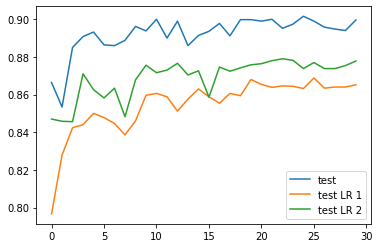

In [14]:
import matplotlib.pyplot as plt
plt.plot(history1.history['val_accuracy'], label = "test")
plt.plot(history2.history['val_accuracy'], label = "test LR 1")
plt.plot(history3.history['val_accuracy'], label = "test LR 2")
plt.legend()
plt.show()